# GeoJson Interpreter
This notebook creates the node information for the D3 interface over the newyork landscape.

In [6]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import geopandas as gpd
from shapely.geometry import Point

### Loads the GeoJson File

In [7]:
geo_taxis = gpd.read_file('taxi_zones.geojson')
geo_taxis.sample(10)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
162,163,0.034177,0.000041,Midtown North,163,Manhattan,"POLYGON ((-73.98136213699993 40.7678367389999,..."
164,165,0.088608,0.000354,Midwood,165,Brooklyn,POLYGON ((-73.96014773499996 40.62891518499987...
247,248,0.056919,0.000150,West Farms/Bronx River,248,Bronx,POLYGON ((-73.86393748099979 40.84004456599993...
71,72,0.095202,0.000324,East Flatbush/Remsen Village,72,Brooklyn,POLYGON ((-73.92021313099984 40.65997544099987...
89,90,0.030759,0.000055,Flatiron,90,Manhattan,"POLYGON ((-73.9963368949999 40.73804374699991,..."
132,133,0.065135,0.000157,Kensington,133,Brooklyn,"POLYGON ((-73.9781907439999 40.64752599199991,..."
257,258,0.089013,0.000366,Woodhaven,258,Queens,POLYGON ((-73.84504194899991 40.68931894699995...
11,12,0.036661,0.000042,Battery Park,12,Manhattan,POLYGON ((-74.01565756599994 40.70483308799993...
127,128,0.070209,0.000207,Inwood Hill Park,128,Manhattan,(POLYGON ((-73.92359742020388 40.8788987129926...
68,69,0.078990,0.000199,East Concourse/Concourse Village,69,Bronx,POLYGON ((-73.91179361999995 40.82642815599989...


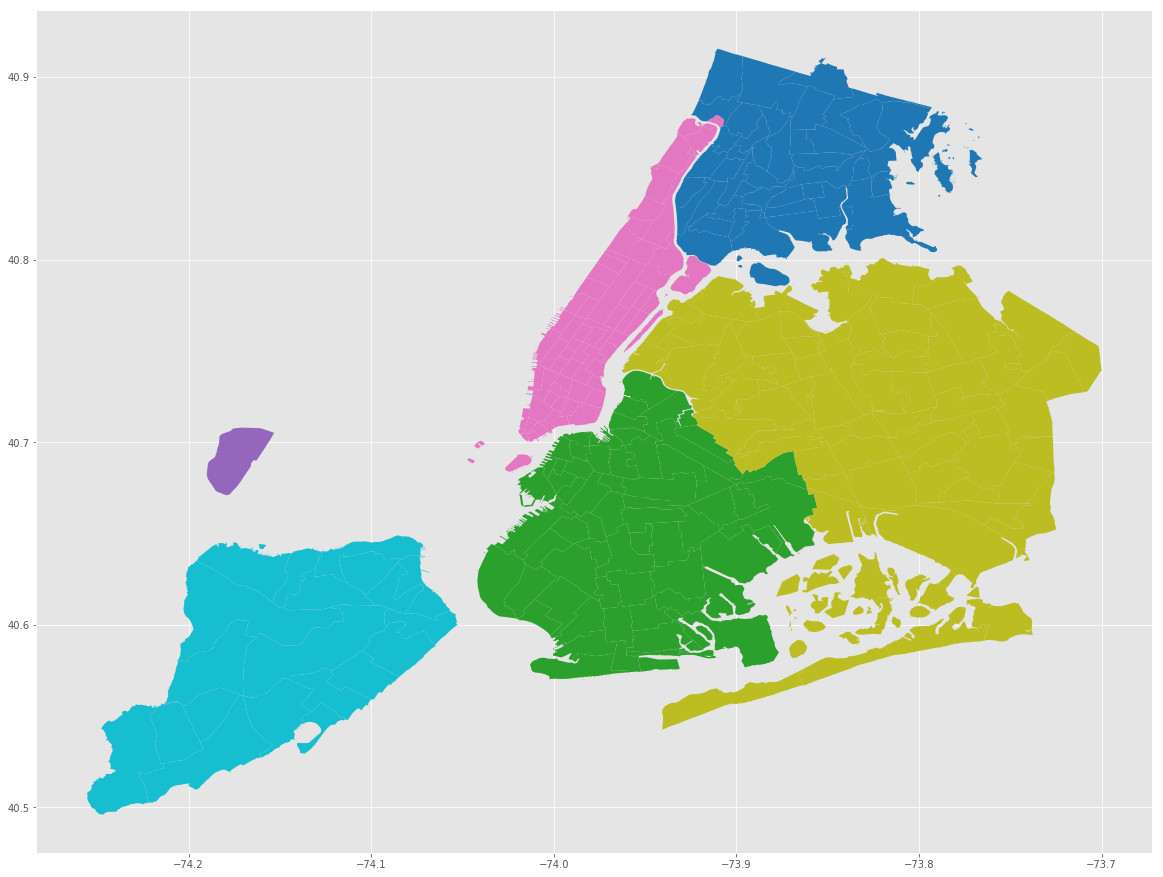

In [8]:
geo_taxis.plot(column = 'borough', figsize = (20,20))

### Creates the D3 Json File

In [9]:
# First creates regular pandas
df_taxis = geo_taxis[['zone','borough']].copy()
#adds id column
df_taxis['id'] = np.arange(1,df_taxis.shape[0] + 1)
df_taxis = df_taxis[['id','zone','borough']].copy()
df_taxis['lon'] = [pt.x for pt in geo_taxis.geometry.centroid]
df_taxis['lat'] = [pt.y for pt in geo_taxis.geometry.centroid]
df_taxis['lon'] = df_taxis['lon'].astype(float)
df_taxis['lat'] = df_taxis['lat'].astype(float)
#adds the location column
# borough or airport
df_taxis['location'] = df_taxis['borough']
df_taxis.loc[0,'location'] = 'Airport'
df_taxis.loc[131,'location'] = 'Airport'
df_taxis.loc[137,'location'] = 'Airport'



#replaces / with -
df_taxis['zone'] = df_taxis['zone'].map(lambda s : s.replace('/','-'))

df_taxis.sample(10)


,id,zone,borough,lon,lat,location
166,167,Morrisania-Melrose,Bronx,-73.902352,40.827513,Bronx
183,184,Pelham Bay Park,Bronx,-73.807857,40.868276,Bronx
117,118,Heartland Village-Todt Hill,Staten Island,-74.132979,40.586555,Staten Island
159,160,Middle Village,Queens,-73.880051,40.718337,Queens
194,195,Red Hook,Brooklyn,-74.009178,40.675549,Brooklyn
24,25,Boerum Hill,Brooklyn,-73.986114,40.685634,Brooklyn
90,91,Flatlands,Brooklyn,-73.930097,40.626273,Brooklyn
109,110,Great Kills Park,Staten Island,-74.128342,40.545780,Staten Island
89,90,Flatiron,Manhattan,-73.996971,40.742279,Manhattan
148,149,Madison,Brooklyn,-73.948136,40.604914,Brooklyn


In [10]:
dict_temp = df_taxis.to_dict(orient = 'records')
dict_final = {}
i = 0
for zone in dict_temp:
    i = i +1
    dict_final[str(i)] = dict(zone)
    
    
dict_final

{'1': {'borough': 'EWR',
  'id': 1,
  'lat': 40.69183120640135,
  'location': 'Airport',
  'lon': -74.174000272763,
  'zone': 'Newark Airport'},
 '10': {'borough': 'Queens',
  'id': 10,
  'lat': 40.678953310115126,
  'location': 'Queens',
  'lon': -73.79098635986963,
  'zone': 'Baisley Park'},
 '100': {'borough': 'Manhattan',
  'id': 100,
  'lat': 40.753512758725506,
  'location': 'Manhattan',
  'lon': -73.98878659911529,
  'zone': 'Garment District'},
 '101': {'borough': 'Queens',
  'id': 101,
  'lat': 40.745993818384065,
  'location': 'Queens',
  'lon': -73.7110259869124,
  'zone': 'Glen Oaks'},
 '102': {'borough': 'Queens',
  'id': 102,
  'lat': 40.7035456107627,
  'location': 'Queens',
  'lon': -73.87573576709778,
  'zone': 'Glendale'},
 '103': {'borough': 'Manhattan',
  'id': 103,
  'lat': 40.68986010366002,
  'location': 'Manhattan',
  'lon': -74.04528829363998,
  'zone': "Governor's Island-Ellis Island-Liberty Island"},
 '104': {'borough': 'Manhattan',
  'id': 104,
  'lat': 40.6

In [11]:
def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    try:
        # exists
        with open( name + '.pkl', 'rb') as f:
            return pickle.load(f)
    except FileNotFoundError:
        return None

In [12]:
import pickle
with open( 'zonas_dict' + '.pkl', 'wb') as f:
        pickle.dump(dict_final, f, pickle.HIGHEST_PROTOCOL)


In [13]:
links_arr = []
for i in range(24):
    src = [1,132,138]
    src = df_taxis.id.values
    des = df_taxis.id.values

    num_conections = 100
    # Creates sample links data
    df_links = pd.DataFrame({'source': np.random.choice( src ,num_conections, replace = True), 'target': np.random.choice( des ,num_conections, replace = True), 'count': np.random.choice(range(20),num_conections)})
    df_links['count'] = df_links['count'].astype(int)
    df_links['target'] = df_links['target'].astype(int)
    df_links['source'] = df_links['source'].astype(int)
    
    links_arr.append(df_links.to_dict(orient = 'records'))

links_arr

[[{'count': 13, 'source': 129, 'target': 88},
  {'count': 3, 'source': 27, 'target': 202},
  {'count': 7, 'source': 68, 'target': 159},
  {'count': 4, 'source': 224, 'target': 106},
  {'count': 12, 'source': 73, 'target': 77},
  {'count': 19, 'source': 135, 'target': 9},
  {'count': 0, 'source': 192, 'target': 238},
  {'count': 7, 'source': 102, 'target': 147},
  {'count': 8, 'source': 14, 'target': 260},
  {'count': 0, 'source': 233, 'target': 50},
  {'count': 17, 'source': 7, 'target': 254},
  {'count': 19, 'source': 52, 'target': 182},
  {'count': 15, 'source': 234, 'target': 31},
  {'count': 6, 'source': 97, 'target': 174},
  {'count': 7, 'source': 103, 'target': 105},
  {'count': 1, 'source': 251, 'target': 132},
  {'count': 18, 'source': 222, 'target': 78},
  {'count': 3, 'source': 174, 'target': 70},
  {'count': 2, 'source': 10, 'target': 20},
  {'count': 11, 'source': 53, 'target': 205},
  {'count': 4, 'source': 65, 'target': 131},
  {'count': 9, 'source': 29, 'target': 140},
 

In [14]:
range(1,3)

range(1, 3)

In [15]:
# Creates the sample links in the format that will receive the interface
link_arr = []
for src in df_taxis.id.values:
    for des in df_taxis.id.values:
        if(des < src):
            temp = {}
            temp['source'] = src
            temp['target'] = des
            temp['count'] = np.random.choice( [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1] ,24, replace = True)
            link_arr.append(temp.copy())

link_arr       

[{'count': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0]), 'source': 2, 'target': 1},
 {'count': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0]),
  'source': 3,
  'target': 1},
 {'count': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]), 'source': 3, 'target': 2},
 {'count': array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]), 'source': 4, 'target': 1},
 {'count': array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]), 'source': 4, 'target': 2},
 {'count': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0]), 'source': 4, 'target': 3},
 {'count': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]), 'source': 5, 'target': 1},
 {'count': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),

In [16]:
nodes = df_taxis.to_dict(orient = 'records')
links = links_arr

In [17]:
import json
# Exports the  created data

data = {}
data['nodes'] = nodes
data['links'] = links
#json_data = json.dumps(data)

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)
        

with open('taxi_data.json', 'w') as outfile:
    json.dump(data, outfile,  cls=MyEncoder)    

## Importa desde lo recibido de Hadoop

In [18]:
import json
def get_data():
    with open('RA2_result_sample.txt') as f:
        return(f.readlines())

In [19]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

max_visual_size = 10
max_input = 0
max_zone = 264        
sizes_dic = {}


for i in range(1,max_zone):
    sizes_dic[i] = 0

complete_dic = {}
sizes = {}

#weekdays
weekdays = ['MON','TUE','WED','THU','FRI','SAT','SUN']
for weekday in weekdays:
    complete_dic[weekday] = [[] for i in range(24)]
    sizes[weekday] = [ dict(sizes_dic) for i in range(24)]

#monthdays
month_days = [i for i in range(1,32)]

for month_day in month_days:
    complete_dic[month_day] = [[] for i in range(24)]
    sizes[month_day] = [ dict(sizes_dic) for i in range(24)]

lines = get_data()
for line in lines:
    line = line.strip()
    moment, hour, trips = line.split('\t')
    
    try:
        moment = int(moment)
    except:
        pass
    
    hour = int(hour)
    current_list = complete_dic[moment][hour] 
    current_sizes =  sizes[moment][hour]
    
    for trip in trips.split(';'):
        if(trip):
            source, destination, num_trips = trip.split(':')
            source = int(source)
            destination = int(destination)
            num_trips = int(num_trips)
            temp = {}
            
            if(source in range(1,264) and destination in range(1,264)):            
                temp['source'] = source
                temp['target'] = destination
                temp['count'] = num_trips
            
                current_list.append(dict(temp))
                current_sizes[source] = current_sizes[source] + 1
                max_input = max(max_input, current_sizes[source])
                current_sizes[destination] = current_sizes[destination] + 1
                max_input = max(max_input, current_sizes[destination])            
                
                
            else:
                pass
            
all_s = [] 
num_trips = copy.deepcopy(sizes)
for k,v in sizes.items():
    for temp_dict in v:
        for k2, v2 in temp_dict.items():
            temp_dict[k2] = (v2*max_visual_size)/max_input
            all_s.append(temp_dict[k2])
        
print(np.max(all_s))


with open('links.json', 'w') as outfile:
    json.dump(complete_dic, outfile,  cls=MyEncoder)
    
with open('nodes.json', 'w') as outfile:
    json.dump(nodes, outfile,  cls=MyEncoder)   
    
with open('sizes.json', 'w') as outfile:
    json.dump(sizes, outfile,  cls=MyEncoder)  

with open('num_trips.json', 'w') as outfile:
    json.dump(num_trips, outfile,  cls=MyEncoder)  
    
    

NameError: name 'copy' is not defined

In [69]:

import copy

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

max_visual_size = 10
max_input = 0
#max_zone = 264  
max_zone = 50        
sizes_dic = {}


for i in range(1,max_zone):
    sizes_dic[i] = 0

complete_dic = {}
sizes = {}


#weekdays
weekdays = ['MON','TUE','WED','THU','FRI','SAT','SUN']
for weekday in weekdays:
    complete_dic[weekday] = [[] for i in range(24)]
    sizes[weekday] = [ dict(sizes_dic) for i in range(24)]

#monthdays
month_days = [i for i in range(1,32)]

for month_day in month_days:
    complete_dic[month_day] = [[] for i in range(24)]
    sizes[month_day] = [ dict(sizes_dic) for i in range(24)]

lines = get_data()
for line in lines:
    line = line.strip()
    moment, hour, trips = line.split('\t')
    
    try:
        moment = int(moment)
    except:
        pass
    
    hour = int(hour)
    current_list = complete_dic[moment][hour] 
    current_sizes =  sizes[moment][hour]
    
    for trip in trips.split(';'):
        if(trip):
            source, destination, num_trips = trip.split(':')
            source = int(source)
            destination = int(destination)
            num_trips = int(num_trips)
            temp = {}
            
            if(source in range(1,max_zone) and destination in range(1,max_zone)):            
                temp['source'] = source
                temp['target'] = destination
                temp['count'] = num_trips
            
                current_list.append(dict(temp))
                current_sizes[source] = current_sizes[source] + 1
                max_input = max(max_input, current_sizes[source])
                current_sizes[destination] = current_sizes[destination] + 1
                max_input = max(max_input, current_sizes[destination])            
                
                
            else:
                pass
            
all_s = []  
num_trips = copy.deepcopy(sizes)
for k,v in sizes.items():
    for temp_dict in v:
        for k2, v2 in temp_dict.items():
            temp_dict[k2] = (v2*max_visual_size)/max_input
            all_s.append(temp_dict[k2])
        
print(np.max(all_s))

final_nodes = []
for node in nodes:
    if(node["id"] in range(1,max_zone)):
        final_nodes.append(node)
    


with open('links.json', 'w') as outfile:
    json.dump(complete_dic, outfile,  cls=MyEncoder)
    
with open('nodes.json', 'w') as outfile:
    json.dump(final_nodes, outfile,  cls=MyEncoder)   
    
with open('sizes.json', 'w') as outfile:
    json.dump(sizes, outfile,  cls=MyEncoder)  
        
with open('num_trips.json', 'w') as outfile:
    json.dump(num_trips, outfile,  cls=MyEncoder)  

10.0


## Node Info

In [48]:
from shapely.geometry import Point

df_parks = pd.read_csv('Areas_of_Interest_Centroids.csv')
df_parks = df_parks[['the_geom', 'Name']]

geometry = [ Point((float(p.split(' ')[1][1:]), float(p.split(' ')[2][:-1]))) for p in df_parks.the_geom.values]

crs = {'init': 'epsg:4326'}
geo_parks = gpd.GeoDataFrame(df_parks, crs=crs, geometry=geometry)
geo_parks.sample(10)

,the_geom,Name,geometry
30,POINT (-73.9376482616997 40.64686106018592),Holy Cross Cemetery,POINT (-73.93764826169971 40.64686106018592)
20,POINT (-73.98190208354553 40.76806052553004),Columbus Circle,POINT (-73.98190208354553 40.76806052553004)
32,POINT (-74.0323085182286 40.639958950876455),Owls Head Park,POINT (-74.0323085182286 40.63995895087645)
58,POINT (-73.76899845415153 40.77133494883229),Crocheron Park,POINT (-73.76899845415153 40.77133494883229)
88,POINT (-73.9936953325996 40.58507538957254),Calvert Vaux,POINT (-73.9936953325996 40.58507538957254)
80,POINT (-74.21806393427 40.509664690342944),Mount Loretto,POINT (-74.21806393427001 40.50966469034294)
82,POINT (-74.20503665657094 40.55118349678608),South Shore Golf Course,POINT (-74.20503665657094 40.55118349678608)
36,POINT (-73.92408612898762 40.6033622478687),Marine Park,POINT (-73.92408612898762 40.6033622478687)
84,POINT (-73.91512177856971 40.58319523665636),Plumb Beach,POINT (-73.91512177856971 40.58319523665636)
63,POINT (-73.9131473948865 40.73707174406401),New Calvary Cemetery,POINT (-73.91314739488649 40.73707174406401)


In [51]:
geo_taxis['id'] = np.arange(1,df_taxis.shape[0] + 1)
df_parques_taxis = gpd.sjoin( geo_parks, geo_taxis, op = 'within' )
df_parques_taxis.sample(10)

,the_geom,Name,geometry,index_right,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,id
18,POINT (-73.92997389407995 40.784284324777666),Ward's Island Park,POINT (-73.92997389407995 40.78428432477767),193,194,0.081794,0.000273,Randalls Island,194,Manhattan,194
23,POINT (-73.99038010031393 40.73595972106511),Union Square,POINT (-73.99038010031393 40.73595972106511),233,234,0.036072,0.000073,Union Sq,234,Manhattan,234
57,POINT (-73.78886382836278 40.782589659950936),Clearview Park,POINT (-73.78886382836278 40.78258965995094),14,15,0.144336,0.000925,Bay Terrace/Fort Totten,15,Queens,15
22,POINT (-73.9880666276522 40.74218139635935),Madison Square,POINT (-73.9880666276522 40.74218139635935),233,234,0.036072,0.000073,Union Sq,234,Manhattan,234
55,POINT (-73.76903038011216 40.72903318311167),Cunningham Park,POINT (-73.76903038011216 40.72903318311167),97,98,0.121661,0.000486,Fresh Meadows,98,Queens,98
74,POINT (-74.12560543839727 40.54844478732872),Great Kills Park,POINT (-74.12560543839727 40.54844478732872),109,110,0.103946,0.000526,Great Kills Park,110,Staten Island,110
49,POINT (-73.87963218810509 40.72035302706922),Juniper Valley Park,POINT (-73.87963218810509 40.72035302706922),159,160,0.141519,0.000571,Middle Village,160,Queens,160
78,POINT (-74.17535438004438 40.5312531726696),Blue Heron Park,POINT (-74.17535438004438 40.5312531726696),83,84,0.233624,0.002074,Eltingville/Annadale/Prince's Bay,84,Staten Island,84
41,POINT (-73.75238277093409 40.651908212675536),Brookville Park,POINT (-73.75238277093409 40.65190821267554),202,203,0.189938,0.000615,Rosedale,203,Queens,203
60,POINT (-73.73228698411853 40.75164377669763),Douglaston Park,POINT (-73.73228698411853 40.75164377669763),63,64,0.184452,0.001058,Douglaston,64,Queens,64


In [56]:
node_data = {}

for ind,row in df_taxis.iterrows():
    node_data[row.id] = {}
    node_data[row.id]['barrio'] =row.zone
    node_data[row.id]['borough'] = row.borough
    
    parques_dic = []
    parques = df_parques_taxis.loc[df_parques_taxis.id == row.id, 'Name']
    for parque in parques:
        parques_dic.append({'name': parque, 'type': 'Parque'})
        
    node_data[row.id]['atractors'] = parques_dic
    


In [57]:
with open('node_info.json', 'w') as outfile:
    json.dump(node_data, outfile,  cls=MyEncoder)      

In [58]:
node_data

{1: {'atractors': [], 'barrio': 'Newark Airport', 'borough': 'EWR'},
 2: {'atractors': [{'name': 'Jamaica Bay Wildlife Refuge', 'type': 'Parque'}],
  'barrio': 'Jamaica Bay',
  'borough': 'Queens'},
 3: {'atractors': [], 'barrio': 'Allerton-Pelham Gardens', 'borough': 'Bronx'},
 4: {'atractors': [], 'barrio': 'Alphabet City', 'borough': 'Manhattan'},
 5: {'atractors': [], 'barrio': 'Arden Heights', 'borough': 'Staten Island'},
 6: {'atractors': [{'name': 'Fort Wadsworth', 'type': 'Parque'}],
  'barrio': 'Arrochar-Fort Wadsworth',
  'borough': 'Staten Island'},
 7: {'atractors': [], 'barrio': 'Astoria', 'borough': 'Queens'},
 8: {'atractors': [{'name': 'Astoria Park', 'type': 'Parque'}],
  'barrio': 'Astoria Park',
  'borough': 'Queens'},
 9: {'atractors': [], 'barrio': 'Auburndale', 'borough': 'Queens'},
 10: {'atractors': [{'name': 'Baisley Pond Park', 'type': 'Parque'}],
  'barrio': 'Baisley Park',
  'borough': 'Queens'},
 11: {'atractors': [], 'barrio': 'Bath Beach', 'borough': 'Bro